# GROCERY SALE FORECASTING TIME SERIES

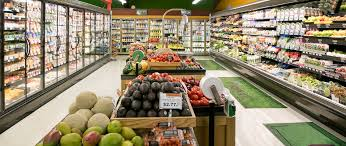

## INTRODUCTION

Sales forecasting is the foundation of a business’s financial story. Once you have your sales forecast you can create profit and loss statements, cash flow statements and balance sheets, thus helping you set goals for your company. Proper forecasting also ensures you have the right stock at all times and leads to less wasted stock.

Having the skill to create a sales forecast will help you manage anything from a small business up to a large company, where you need to inform investors about your forecasts for a months, quarter or a year.

## GOAL OF THE PROJECT

The objective of this challenge is to create a model to forecast the number of products purchased per week per store over the next eight weeks, for grocery stores located in different areas in the same country. The solution to this challenge can be used by small chain stores to know how much stock to order per week and per month



## General
"Data analysis is a process of inspecting, cleansing, transforming, and modeling data with the goal of discovering useful information, informing conclusions, and supporting decision-making." ([Wikipedia](https://en.wikipedia.org/wiki/Data_analysis)).

In Data Analysis, there are some analysis paradigms : **Univariate, Bivariate, Multivariate**. We apply these paradigms to analyze the features (or statistical variables, or columns of the dataframe) of the dataset and to have a better understanding.

**Numeric features** are features with numbers that you can perform mathematical operations on. They are further divided into discrete (countable integers with clear boundaries) and continuous (can take any value, even decimals, within a range).

**Categorical features** are columns with a limited number of possible values. Examples are `sex, country, or age group`.

## Notebook overview

This notebook is a guide to start practicing Data Analysis.

# Library Importation

In [1]:
# Data handling
import pandas as pd
import numpy as np
from calendar import *

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from pandas import Series

# Time series models
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Feature Processing (Scikit-learn processing, etc. )
import sklearn 
import scipy

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import  svm

# Evalution Metrics
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import GroupKFold, RepeatedKFold, KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# Other packages
import pickle
import os
import warnings
warnings.filterwarnings("ignore")

# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [2]:
# For CSV, use pandas.read_csv
df_tr = pd.read_csv("../datasets/train 1.csv")
df_te = pd.read_csv("../datasets/test 1.csv")
df_st = pd.read_csv("../datasets/stores.csv")
df_ho = pd.read_csv("../datasets/holidays.csv")
df_dat = pd.read_csv("../datasets/dates.csv")

# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

## Project objective
Forecast the number of products sold per store per week for a local grocery store

## Hypothesis

1. Null Hypothesis: Series is stationary.
2. Alternate Hypothesis: Series is non-stationary.





## Questions

1. Is the train dataset complete (has all the required dates)? Yes
2. Which dates have the lowest and highest sales for each year?
3. Are certain groups of stores selling more products?
4. Which category of products are the most purchased?
5. Which time of year are most purchases made?
6. Which shops recorded the highest sales and with what products?	 
7.	Are sales affected by holidays?
8.	What analysis can we get from the date and its extractable features?
9. Which product category was promoted most?
10. Which day, month, and year recorded the highest promotion?
11. Are product purchased affected by promotion?


## Dataset overview

Have a look at the loaded datsets using the following methods: `.head(), .info()`

# variable definitions

1. Target: the total sales for a product category at a particular store at a given date
2. Stores_id: the unique store id
3. Category_id: the unique Product category id
4. Date: date in numerical representation
5. Onpromotion: gives the total number of items in a Product category that were being promoted at a store at a given date
6. Nbr_of_transactions: the total number of transactions happened at a store at a given date
7. year_weekofyear: the combination of the year and the week of the year, (year_weekofyear = year*100+week_of_year)
8. ID: the unique identifier for each row in the testing set: year_week_{year_weekofyear}_{store_id}_{Category_id}

In [3]:
# train dataset
df_tr.head()

,date,store_id,category_id,target,onpromotion,nbr_of_transactions
0,365,store_1,category_24,0.0,0,0.0
1,365,store_1,category_21,0.0,0,0.0
2,365,store_1,category_32,0.0,0,0.0
3,365,store_1,category_18,0.0,0,0.0
4,365,store_1,category_26,0.0,0,0.0


In [4]:
# check the number of rows,columns and the dates for the train data
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248884 entries, 0 to 2248883
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   date                 int64  
 1   store_id             object 
 2   category_id          object 
 3   target               float64
 4   onpromotion          int64  
 5   nbr_of_transactions  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 102.9+ MB


In [5]:
# Check train duplicates
df_tr.duplicated().sum()

0

In [6]:
# Check missing values in the train data set
df_tr.isna().sum()

date                   0
store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
dtype: int64

In [7]:
# test data set
df_te.head()

,date,store_id,category_id,onpromotion
0,1627,store_1,category_24,0
1,1627,store_1,category_21,0
2,1627,store_1,category_32,0
3,1627,store_1,category_18,16
4,1627,store_1,category_26,0


In [8]:
# check the number of rows,columns and the dates for the test data
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99792 entries, 0 to 99791
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         99792 non-null  int64 
 1   store_id     99792 non-null  object
 2   category_id  99792 non-null  object
 3   onpromotion  99792 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.0+ MB


In [9]:
# check duplicates in
df_te.duplicated().sum()

0

In [10]:
# store missing values
df_te.isna().sum()

date           0
store_id       0
category_id    0
onpromotion    0
dtype: int64

In [11]:
# store dataset
df_st.head()

,store_id,city,type,cluster
0,store_1,0,0,0
1,store_2,0,0,0
2,store_3,0,0,1
3,store_4,0,0,2
4,store_5,1,0,3


In [12]:
# check the number of rows,columns and the dates for the test data
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   store_id  54 non-null     object
 1   city      54 non-null     int64 
 2   type      54 non-null     int64 
 3   cluster   54 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


In [13]:
# checking duplicates in the store dataset
df_st.duplicated().sum()

0

In [14]:
# checking store missing value
df_st.isna().sum()

store_id    0
city        0
type        0
cluster     0
dtype: int64

In [15]:
# Holiday data set
df_ho.head

<bound method NDFrame.head of      date  type
0       1     0
1       5     4
2      12     4
3      42     0
4      43     0
..    ...   ...
276  1663     2
277  1674     0
278  1679     0
279  1680     1
280  1684     0

[281 rows x 2 columns]>

In [16]:
# # check the number of rows,columns and the dates for the holiday data
df_ho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   date    281 non-null    int64
 1   type    281 non-null    int64
dtypes: int64(2)
memory usage: 4.5 KB


In [17]:
# checking for holiday duplicates
df_ho.duplicated().sum()

17

In [18]:
# Distint numbers in holiday data
df_ho["type"].unique()

array([0, 4, 2, 5, 1, 3], dtype=int64)

In [19]:
# checking for missing values in the holiday dataset
df_ho.isna().sum()

date    0
type    0
dtype: int64

In [20]:
# Date dataset
df_dat.head()

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,1,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,1,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,1,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,1,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,1,1,5,6,5,1,1,False,False,False,False,False,False,101


In [21]:
# assumption: year 1-4, 2018, 2019, 2020, 2021

year = {1:"2018", 2:"2019", 3:"2020", 4:"2021"}
df_dat["year"] = df_dat["year"].apply(lambda x: year[x]) 
df_dat["year"] = df_dat["year"].astype(int)
df_dat

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
0,365,2018,1,1,2,1,1,1,True,False,True,False,True,False,101
1,366,2018,1,2,3,2,1,1,False,False,False,False,False,False,101
2,367,2018,1,3,4,3,1,1,False,False,False,False,False,False,101
3,368,2018,1,4,5,4,1,1,False,False,False,False,False,False,101
4,369,2018,1,5,6,5,1,1,False,False,False,False,False,False,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,2021,8,11,4,223,32,3,False,False,False,False,False,False,432
1316,1681,2021,8,12,5,224,32,3,False,False,False,False,False,False,432
1317,1682,2021,8,13,6,225,32,3,False,False,False,False,False,False,432
1318,1683,2021,8,14,0,226,33,3,False,False,False,False,False,False,433


In [22]:
#create fulldate column from year, month, and day columns
df_dat['Date'] = pd.to_datetime(dict(year=df_dat.year, month=df_dat.month, day=df_dat.dayofmonth))


In [23]:
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
month = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

df_dat["dayofweek"] = df_dat["dayofweek"].apply(lambda x: days[x])
df_dat["month"] = df_dat["month"].apply(lambda x: month[x])
df_dat

,date,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,365,2018,Jan,1,Weds,1,1,1,True,False,True,False,True,False,101,2018-01-01
1,366,2018,Jan,2,Thurs,2,1,1,False,False,False,False,False,False,101,2018-01-02
2,367,2018,Jan,3,Fri,3,1,1,False,False,False,False,False,False,101,2018-01-03
3,368,2018,Jan,4,Sat,4,1,1,False,False,False,False,False,False,101,2018-01-04
4,369,2018,Jan,5,Sun,5,1,1,False,False,False,False,False,False,101,2018-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,1680,2021,Aug,11,Fri,223,32,3,False,False,False,False,False,False,432,2021-08-11
1316,1681,2021,Aug,12,Sat,224,32,3,False,False,False,False,False,False,432,2021-08-12
1317,1682,2021,Aug,13,Sun,225,32,3,False,False,False,False,False,False,432,2021-08-13
1318,1683,2021,Aug,14,Mon,226,33,3,False,False,False,False,False,False,433,2021-08-14


## Merging Dataset

### Train dataset

In [24]:
# merge train data with other data
df_t1 = pd.merge(df_tr, df_st, on="store_id")


In [25]:
# Merge the resulting data with the holiday
df_t2 = pd.merge(df_t1, df_ho, on="date", how="left")
df_t2

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type_x,cluster,type_y
0,365,store_1,category_24,0.000,0,0.0,0,0,0,0.0
1,365,store_1,category_21,0.000,0,0.0,0,0,0,0.0
2,365,store_1,category_32,0.000,0,0.0,0,0,0,0.0
3,365,store_1,category_18,0.000,0,0.0,0,0,0,0.0
4,365,store_1,category_26,0.000,0,0.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2288083,1626,store_9,category_23,539.725,0,2141.0,0,1,4,NaN
2288084,1626,store_9,category_20,84.177,0,2141.0,0,1,4,NaN
2288085,1626,store_9,category_15,1973.760,3,2141.0,0,1,4,NaN
2288086,1626,store_9,category_29,2.000,0,2141.0,0,1,4,NaN


In [26]:
df_t1.isna().sum()

date                   0
store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
city                   0
type                   0
cluster                0
dtype: int64

In [27]:
df_t2.isna().sum()

date                         0
store_id                     0
category_id                  0
target                       0
onpromotion                  0
nbr_of_transactions          0
city                         0
type_x                       0
cluster                      0
type_y                 1899612
dtype: int64

In [28]:
df_train1 = pd.merge(df_t1, df_dat, on="date", how="left")
df_train1

,date,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,365,store_1,category_24,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
1,365,store_1,category_21,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
2,365,store_1,category_32,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
3,365,store_1,category_18,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
4,365,store_1,category_26,0.000,0,0.0,0,0,0,2018,...,1,1,True,False,True,False,True,False,101,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248879,1626,store_9,category_23,539.725,0,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18
2248880,1626,store_9,category_20,84.177,0,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18
2248881,1626,store_9,category_15,1973.760,3,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18
2248882,1626,store_9,category_29,2.000,0,2141.0,0,1,4,2021,...,24,2,False,False,False,False,False,False,424,2021-06-18


In [29]:
# assumption is all 0s in holiday data shows no holiday
df_train = df_train1.fillna(value=0)

In [30]:
# drop the date column from the data set
df_train.drop(columns="date", inplace=True)


In [31]:
df_train.isna().sum()

store_id               0
category_id            0
target                 0
onpromotion            0
nbr_of_transactions    0
city                   0
type                   0
cluster                0
year                   0
month                  0
dayofmonth             0
dayofweek              0
dayofyear              0
weekofyear             0
quarter                0
is_month_start         0
is_month_end           0
is_quarter_start       0
is_quarter_end         0
is_year_start          0
is_year_end            0
year_weekofyear        0
Date                   0
dtype: int64

### Test dataset

In [32]:
# merge test data with other data

merged1 = df_te.merge(df_dat, how = 'left', on=['date'])

merged = merged1.merge(df_st, how = 'left',                   
    on=['store_id'])

df_test = merged.merge(df_ho, how = 'left', on = ['date'])
df_test

,date,store_id,category_id,onpromotion,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,...,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date,city,type_x,cluster,type_y
0,1627,store_1,category_24,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
1,1627,store_1,category_21,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
2,1627,store_1,category_32,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
3,1627,store_1,category_18,16,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
4,1627,store_1,category_26,0,2021,Jun,19,Mon,170,25,...,False,False,False,False,425,2021-06-19,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105133,1682,store_9,category_23,0,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN
105134,1682,store_9,category_20,1,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN
105135,1682,store_9,category_15,7,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN
105136,1682,store_9,category_29,8,2021,Aug,13,Sun,225,32,...,False,False,False,False,432,2021-08-13,0,1,4,NaN


In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105138 entries, 0 to 105137
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              105138 non-null  int64         
 1   store_id          105138 non-null  object        
 2   category_id       105138 non-null  object        
 3   onpromotion       105138 non-null  int64         
 4   year              105138 non-null  int32         
 5   month             105138 non-null  object        
 6   dayofmonth        105138 non-null  int64         
 7   dayofweek         105138 non-null  object        
 8   dayofyear         105138 non-null  int64         
 9   weekofyear        105138 non-null  int64         
 10  quarter           105138 non-null  int64         
 11  is_month_start    105138 non-null  bool          
 12  is_month_end      105138 non-null  bool          
 13  is_quarter_start  105138 non-null  bool          
 14  is_q

In [34]:
df_test.isna().sum()

date                    0
store_id                0
category_id             0
onpromotion             0
year                    0
month                   0
dayofmonth              0
dayofweek               0
dayofyear               0
weekofyear              0
quarter                 0
is_month_start          0
is_month_end            0
is_quarter_start        0
is_quarter_end          0
is_year_start           0
is_year_end             0
year_weekofyear         0
Date                    0
city                    0
type_x                  0
cluster                 0
type_y              83754
dtype: int64

## Univariate Analysis

‘Univariate analysis’ is the analysis of one variable at a time. This analysis might be done by computing some statistical indicators and by plotting some charts respectively using the pandas dataframe's method `.describe()` and one of the plotting libraries like  [Seaborn](https://seaborn.pydata.org/), [Matplotlib](https://matplotlib.org/), [Plotly](https://seaborn.pydata.org/), etc.

Please, read [this article](https://towardsdatascience.com/8-seaborn-plots-for-univariate-exploratory-data-analysis-eda-in-python-9d280b6fe67f) to know more about the charts.

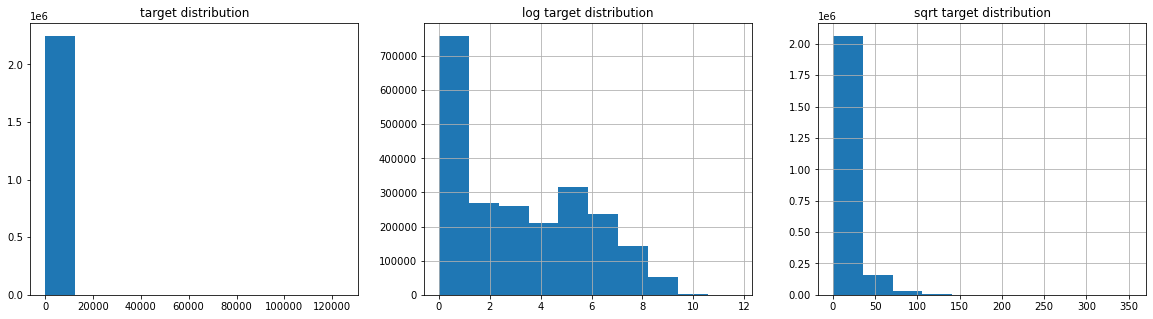

In [35]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 3, 1) 
plt.hist(data = df_train, x = 'target');

plt.title('target distribution')
plt.subplot(1, 3, 2)
np.log1p(df_train['target']).hist();

plt.title('log target distribution')
plt.subplot(1, 3, 3)
np.sqrt(df_train['target']).hist();
plt.title('sqrt target distribution');

In [36]:
# set date as index
df_train_copy = df_train.set_index("Date")

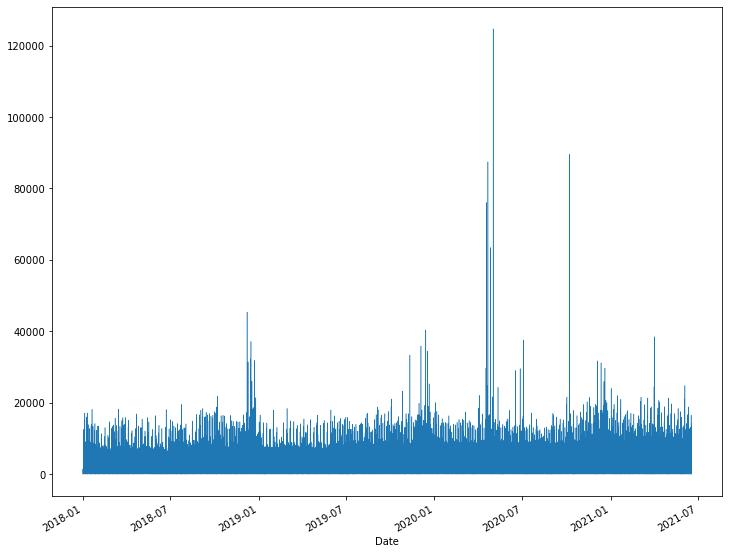

In [37]:
## Visualizing sales
plt.figure(figsize=(12,10))
df_train_copy["target"].plot(linewidth = 0.5)
plt.show()

## Multivariate Analysis

Multivariate analysis’ is the analysis of more than one variable and aims to study the relationships among them. This analysis might be done by computing some statistical indicators like the `correlation` and by plotting some charts.

Please, read [this article](https://towardsdatascience.com/10-must-know-seaborn-functions-for-multivariate-data-analysis-in-python-7ba94847b117) to know more about the charts.

In [38]:
# Code here
corr = df_train.corr()
corr

,target,onpromotion,nbr_of_transactions,city,type,cluster,year,dayofmonth,dayofyear,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear
target,1.000000,0.435450,0.236932,-9.523934e-02,7.670046e-02,6.836286e-02,4.910990e-02,-1.187028e-02,2.160867e-02,1.872772e-02,2.080545e-02,6.271767e-03,3.626151e-03,-4.206229e-03,2.449693e-04,-1.853791e-02,6.338739e-03,5.321916e-02
onpromotion,0.435450,1.000000,0.054022,-1.488255e-02,1.781251e-03,2.506609e-03,1.676007e-01,3.094487e-03,3.457244e-02,2.959729e-02,3.153422e-02,-3.656004e-03,2.487347e-03,-6.465273e-03,1.293491e-03,-1.298547e-02,4.398856e-03,1.764088e-01
nbr_of_transactions,0.236932,0.054022,1.000000,-4.367530e-01,2.888395e-01,2.327518e-01,2.756568e-02,-5.378655e-03,4.533430e-02,2.553377e-02,3.684125e-02,-5.952812e-03,1.463999e-02,-3.776517e-02,1.159234e-02,-8.501621e-02,4.087418e-02,3.587470e-02
city,-0.095239,-0.014883,-0.436753,1.000000e+00,-5.706656e-02,1.515660e-01,2.516652e-11,-2.399184e-16,-7.890618e-15,-2.078580e-14,3.213296e-14,2.730094e-15,-1.641508e-15,2.913545e-16,-3.282032e-16,5.778586e-17,-3.944424e-16,8.978921e-15
type,0.076700,0.001781,0.288840,-5.706656e-02,1.000000e+00,7.224007e-01,1.434496e-11,-2.712843e-15,2.942149e-15,-5.361364e-15,1.565340e-14,1.561532e-15,-1.013518e-15,-6.071731e-16,-8.741301e-16,-5.638885e-17,-4.034206e-16,1.207599e-14
cluster,0.068363,0.002507,0.232752,1.515660e-01,7.224007e-01,1.000000e+00,2.047968e-11,-2.357838e-15,6.911570e-16,-8.886725e-15,1.795359e-14,1.972324e-15,-2.356980e-15,-2.038406e-16,-9.129523e-16,-4.351265e-17,-6.208878e-16,1.124402e-14
year,0.049110,0.167601,0.027566,2.516652e-11,1.434496e-11,2.047968e-11,1.000000e+00,-1.788515e-02,-2.101811e-01,-2.059253e-01,-2.128780e-01,3.108183e-03,-4.439190e-03,1.774266e-03,-1.147573e-02,1.278661e-02,-1.285081e-02,9.884838e-01
dayofmonth,-0.011870,0.003094,-0.005379,-2.399184e-16,-2.712843e-15,-2.357838e-15,-1.788515e-02,1.000000e+00,9.033322e-02,5.918679e-02,1.188063e-02,-3.085768e-01,3.088768e-01,-1.761470e-01,1.734038e-01,-9.377957e-02,8.553391e-02,-4.365795e-03
dayofyear,0.021609,0.034572,0.045334,-7.890618e-15,2.942149e-15,6.911570e-16,-2.101811e-01,9.033322e-02,1.000000e+00,9.665178e-01,9.684651e-01,-2.636715e-02,2.544130e-02,-4.581283e-02,4.608276e-02,-9.060308e-02,9.105371e-02,-6.431883e-02
weekofyear,0.018728,0.029597,0.025534,-2.078580e-14,-5.361364e-15,-8.886725e-15,-2.059253e-01,5.918679e-02,9.665178e-01,1.000000e+00,9.423454e-01,4.092345e-03,9.424712e-03,6.700149e-03,1.936329e-02,7.454366e-03,3.434105e-02,-6.592360e-02


<AxesSubplot:>

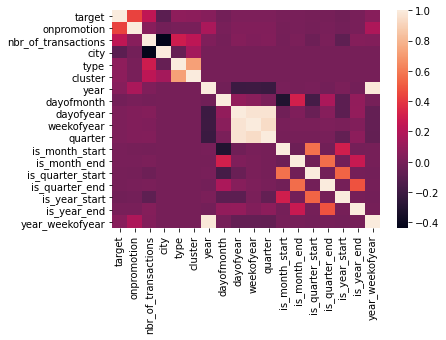

In [39]:
#visualize correlation

sns.heatmap(corr)

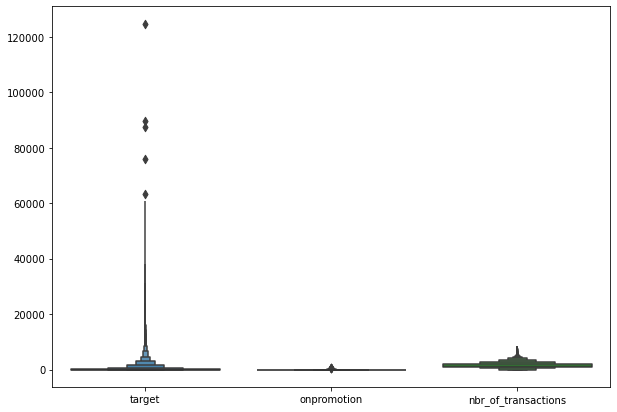

In [40]:
# check for outliers
num_feat = ["target", "onpromotion", "nbr_of_transactions"]
fig = plt.figure(figsize =(10, 7))
sns.boxenplot(data=df_train[num_feat])
plt.show()

# Hypothesis 

### We can check stationarity using the following:

**ACF and PACF plots:** If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

**Plotting Rolling Statistics:** We can plot the moving average or moving variance and see if it varies with time. Moving average/variance is for any instant ‘t’, the average/variance of the last year, i.e. last 12 months.

**Augmented Dickey-Fuller Test:** This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.

**KPSS Test** 
 
## KPSS Testing

In [41]:
kpss(df_train.target)

(65.85447067806862,
 0.01,
 600,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**p-value is 0.01(<0.05) meaning our series is non-stationary**

## QUESTIONS

### 1. Is the train dataset complete (has all the required dates)? 

In [42]:
def get_missing_dates(df_train):

  col = df_train["Date"]

  missing_dates = (pd.date_range(

     

      start=col.min(), #start date

      end=col.max())   #end_date

      .difference(col))

  print(f"we have {len(missing_dates)} dates missing out of {len(col)}")

  return missing_dates

In [43]:
get_missing_dates(df_train)

we have 3 dates missing out of 2248884


DatetimeIndex(['2018-12-25', '2019-12-25', '2020-12-25'], dtype='datetime64[ns]', freq=None)

### 2. Which dates have the lowest and highest sales for each year?

In [44]:
min_sales = df_train.groupby(lambda x: df_train["Date"][x].year)["target"].idxmin()
sales_lowest = df_train.loc[min_sales]
sales_lowest

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,month,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,store_1,category_24,0.0,0,0.0,0,0,0,2018,Jan,...,1,1,True,False,True,False,True,False,101,2018-01-01
12012,store_1,category_24,0.0,0,0.0,0,0,0,2019,Jan,...,1,1,True,False,True,False,True,False,201,2019-01-01
24024,store_1,category_24,0.0,0,0.0,0,0,0,2020,Jan,...,53,1,True,False,True,False,True,False,253,2020-01-01
36069,store_1,category_24,0.0,0,0.0,0,0,0,2021,Jan,...,52,1,True,False,True,False,True,False,352,2021-01-01


In [45]:
max_sales = df_train.groupby(lambda x: df_train["Date"][x].year)["target"].idxmax()
sales_highest = df_train.loc[max_sales]
sales_highest

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,month,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
1177353,store_35,category_7,45361.000,3,624.0,14,2,7,2018,Dec,...,50,4,False,False,False,False,False,False,150,2018-12-08
1189563,store_35,category_7,40351.460,7,594.0,14,2,7,2019,Dec,...,51,4,False,False,False,False,False,False,251,2019-12-14
486168,store_2,category_7,124717.000,59,1905.0,0,0,0,2020,May,...,18,2,False,False,False,False,False,False,318,2020-05-02
2246322,store_9,category_7,38422.625,73,2245.0,0,1,4,2021,Apr,...,13,2,False,False,False,False,False,False,413,2021-04-02


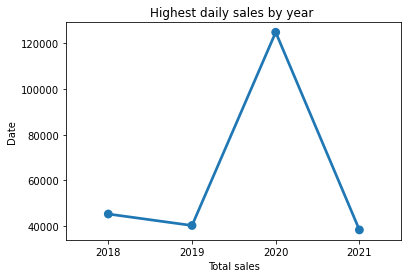

In [46]:
# Visualization


sns.pointplot(data=sales_highest, x="year", y="target")
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest daily sales by year ")
plt.show()

### 3. Are certain groups of stores selling more products?

In [47]:
Stores_sales = df_train.groupby("store_id", as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
Stores_sales

,store_id,target
38,store_44,5.119602e+07
39,store_45,4.502962e+07
41,store_47,4.203455e+07
22,store_3,4.193445e+07
43,store_49,3.725139e+07
40,store_46,3.390839e+07
42,store_48,2.913866e+07
46,store_51,2.681253e+07
52,store_8,2.524399e+07
45,store_50,2.303979e+07


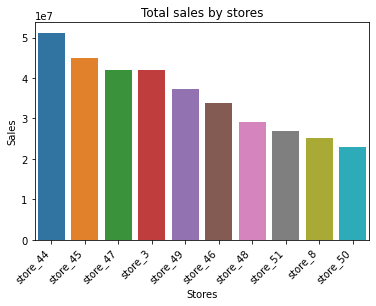

In [48]:
sns.barplot(data=Stores_sales, y="target", x="store_id")
plt.xlabel("Stores")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Sales")
plt.title("Total sales by stores")
plt.show()

### 4. Which category of products are the most purchased?

In [49]:
products_sales = df_train.groupby("category_id", as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
products_sales

,category_id,target
30,category_7,2.708197e+08
10,category_18,1.841306e+08
7,category_15,1.152757e+08
32,category_9,7.596166e+07
6,category_14,5.401186e+07
9,category_17,3.342890e+07
16,category_23,2.624444e+07
4,category_12,2.344414e+07
5,category_13,1.980174e+07
27,category_4,1.917761e+07


###  5. What analysis can we get from the date and its extractable features?
Which time of year are most purchases made?

<AxesSubplot:ylabel='target'>

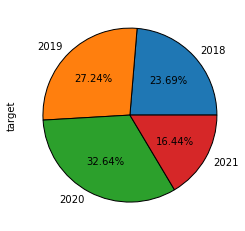

In [50]:
yearly_sales = df_train.groupby("year")["target"].sum().plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
yearly_sales

In [51]:
monthly_sales = df_train.groupby("month", as_index=False)["target"].sum().sort_values(by= "target", ascending=False)
monthly_sales

,month,target
7,Mar,8.579999e+07
4,Jan,8.411453e+07
8,May,8.280143e+07
2,Dec,8.122472e+07
0,Apr,7.967465e+07
6,Jun,7.345336e+07
3,Feb,7.097827e+07
10,Oct,6.830476e+07
9,Nov,6.797923e+07
11,Sep,6.568075e+07


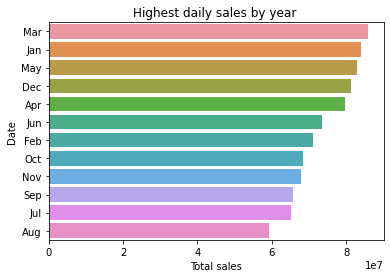

In [52]:
sns.barplot(data=monthly_sales, y="month", x="target")
plt.ylabel("Date")
plt.xlabel("Total sales")
plt.title("Highest daily sales by year ")
plt.show()

In [53]:
#top 10 sales by month and year
t_sales = df_train.groupby(["month", "year"], as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
t_sales

,month,year,target
9,Dec,2020,2.964029e+07
8,Dec,2019,2.724398e+07
32,May,2021,2.691185e+07
28,Mar,2021,2.670402e+07
17,Jan,2021,2.632816e+07
2,Apr,2020,2.596303e+07
3,Apr,2021,2.589531e+07
31,May,2020,2.477943e+07
35,Nov,2020,2.464264e+07
7,Dec,2018,2.434045e+07


In [54]:
daily_sales = df_train.groupby("dayofweek", as_index=False)["target"].sum().sort_values(by= "target", ascending=False)
daily_sales

,dayofweek,target
3,Sun,1.629419e+08
2,Sat,1.530822e+08
1,Mon,1.218983e+08
6,Weds,1.186063e+08
0,Fri,1.146094e+08
5,Tues,1.133877e+08
4,Thurs,9.988139e+07


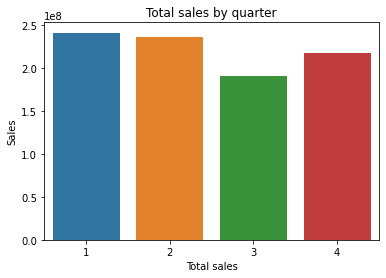

In [55]:
quarterly_sales = df_train.groupby("quarter", as_index=False)["target"].sum()
sns.barplot(data=quarterly_sales, x="quarter", y="target")
plt.ylabel("Sales")
plt.xlabel("Total sales")
plt.title("Total sales by quarter")
plt.show()

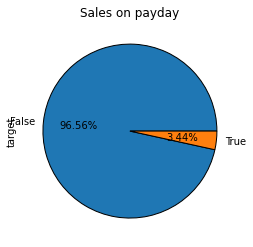

In [56]:
payday_sales = df_train.groupby("is_month_end")["target"].sum()
payday_sales.plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title("Sales on payday")
plt.show()


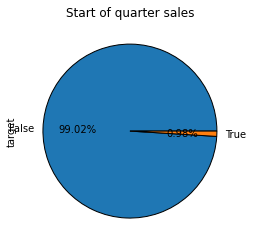

In [57]:
quaterly_start_sales = df_train.groupby("is_quarter_start")["target"].sum().plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title("Start of quarter sales")
plt.show()

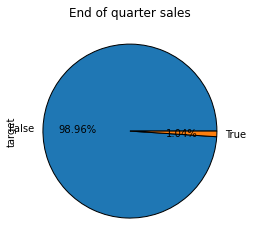

In [58]:
quarterly_end_sales = df_train.groupby("is_quarter_end")["target"].sum().plot(kind="pie", y="target", autopct = '%1.2f%%', wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title("End of quarter sales")
plt.show()

### 6. Which shops recorded the highest sales and with what products?

In [59]:
highest_sales = df_train.groupby(["store_id", "category_id"], as_index=False)["target"].sum().sort_values(by= "target", ascending=False).head(10)
highest_sales

,store_id,category_id,target
1317,store_45,category_7,1.287127e+07
1284,store_44,category_7,1.273035e+07
1383,store_47,category_7,1.221406e+07
1264,store_44,category_18,1.127058e+07
1350,store_46,category_7,1.120828e+07
756,store_3,category_7,1.018669e+07
1261,store_44,category_15,1.009036e+07
1416,store_48,category_7,1.006035e+07
1297,store_45,category_18,9.682288e+06
736,store_3,category_18,9.563545e+06


### 7. Are sales affected by holidays?

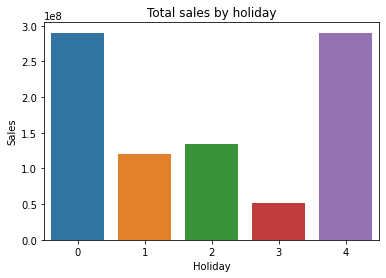

In [60]:
holiday_sales = df_train.groupby("type", as_index=False)["target"].sum().sort_values(by= "target", ascending=False)
sns.barplot(data=holiday_sales, x="type", y="target")
plt.ylabel("Sales")
plt.xlabel("Holiday")
plt.title("Total sales by holiday")
plt.show()

### 8. Which product category was promoted most and purchased most during promotion?

In [61]:
promo_product = df_train.groupby(["category_id", "onpromotion"], as_index=False)["target"].sum().sort_values(by= "onpromotion", ascending=False)
promo_product.head(10)

,category_id,onpromotion,target
1513,category_7,741,7517.0
1512,category_7,726,6044.0
1511,category_7,722,5846.0
1510,category_7,720,6154.0
1509,category_7,719,6681.0
1508,category_7,718,6712.0
1507,category_7,717,6262.0
1506,category_7,716,11401.0
1505,category_7,710,5948.0
1504,category_7,702,6825.0


### 9. Are product purchased affected by promotion?

In [62]:
promotions = df_train.groupby("category_id").apply(lambda x: x[x["onpromotion"] != 0]["target"].sum()).sort_values(ascending=False).reset_index().head(5)
no_promotions = df_train.groupby("category_id").apply(lambda x: x[x["onpromotion"] == 0]["target"].sum()).sort_values(ascending=False).reset_index().head(5)


In [63]:
no_promotions

,category_id,0
0,category_15,4.750057e+07
1,category_7,3.417183e+07
2,category_18,2.889701e+07
3,category_9,1.811096e+07
4,category_23,1.702796e+07


Text(0.5, 1.0, 'Sales of products with or without promotion')

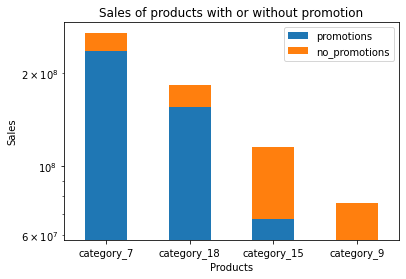

In [64]:
promo=pd.merge(promotions, no_promotions, on="category_id")

ax = promo.plot(kind='bar', stacked=True, x="category_id", logy=True, rot=0)
plt.legend(["promotions", "no_promotions"])
plt.ylabel("Sales")
plt.xlabel("Products")
plt.title("Sales of products with or without promotion")

### 10. Which day, month, and year recorded the highest promotion?

In [65]:
day_promo = df_train.groupby(["category_id", "onpromotion", "dayofweek", "month", "year"], as_index=False)["target"].sum().sort_values(by= "onpromotion", ascending=False)
day_promo.head(7)

,category_id,onpromotion,dayofweek,month,year,target
65716,category_7,741,Tues,May,2020,7517.0
65715,category_7,726,Sun,May,2020,6044.0
65714,category_7,722,Sat,May,2020,5846.0
65713,category_7,720,Sun,May,2020,6154.0
65712,category_7,719,Sun,May,2020,6681.0
65711,category_7,718,Sun,May,2020,6712.0
65710,category_7,717,Sat,May,2020,6262.0


In [66]:
df_train.columns

Index(['store_id', 'category_id', 'target', 'onpromotion',
       'nbr_of_transactions', 'city', 'type', 'cluster', 'year', 'month',
       'dayofmonth', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter',
       'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end',
       'is_year_start', 'is_year_end', 'year_weekofyear', 'Date'],
      dtype='object')

###  Assumptions for holidays type and store cities

Both holidays type and cities are ordinal numbers,it can be interpreted as an object format for better analysis and visualization.

We excluded the holiday dataset from merging because some of the dates were present in the train but absent in test. If we continue to use it will affect the test encoding and test prediction on submission since it will result in majority of the columns when encoding

In [67]:
# create names of cities
cities = {0:'Accra',1:'Kumasi',2:'Cape coast',3:'Tamale',
          4:'Tema',5:'Obuasi',6:'Koforidua',7:'Techiman',
          8:'Ho',9:'Teshie',10:'Gbawe',11:'Winneba',12:'Elmina,',
          13:'Kintampo',14:'Suhum',15:'Mampong',16:'Hohoe',
          17:'Akim Oda',18:'Aflao',19: 'Prestea',20:'Bekwai',21:'Akwatia'
    
}

df_train["city"] = df_train["city"].apply(lambda x: cities[x])
df_test["city"] = df_test["city"].apply(lambda x: cities[x])

In [68]:
df_train['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [69]:
df_test['dayofweek'].unique()

array(['Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat', 'Sun'], dtype=object)

In [70]:
# After exploring the data, we reconvert the month and days into integers
month_d = {'month':{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}}
df_test.replace(month_d, inplace = True)

days = {'dayofweek':{'Mon':1, 'Tues':2, 'Weds':3, 'Thurs':4, 'Fri':5, 'Sat':6, 'Sun':7}}
df_test.replace(days, inplace = True)

month_d = {'month':{'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9,
       'Oct':10, 'Nov':11, 'Dec':12}}
df_train.replace(month_d, inplace = True)

days = {'dayofweek':{'Mon':1, 'Tues':2, 'Weds':3, 'Thurs':4, 'Fri':5, 'Sat':6, 'Sun':7}}
df_train.replace(days, inplace = True)



In [71]:
df_train.head()

,store_id,category_id,target,onpromotion,nbr_of_transactions,city,type,cluster,year,month,...,weekofyear,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,year_weekofyear,Date
0,store_1,category_24,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
1,store_1,category_21,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
2,store_1,category_32,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
3,store_1,category_18,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01
4,store_1,category_26,0.0,0,0.0,Accra,0,0,2018,1,...,1,1,True,False,True,False,True,False,101,2018-01-01


In [72]:
# Rename the store type
df_train = df_train.rename(columns={'type_x':'type'})
df_test = df_test.rename(columns={'type_x':'type'})

In [73]:
df_test.drop(columns=[ "date"], inplace=True)

In [74]:
df_test.shape, df_train.shape

((105138, 22), (2248884, 23))

In [75]:
# Combination of multiple columns to form single column in both train and test data
df_train['YW'] = 'year_week'
df_train['ID'] = df_train['YW']+'_'+df_train['year_weekofyear'].astype(str)+'_'+df_train['store_id']+'_'+df_train['category_id']


df_test['YW'] = 'year_week'
df_test['ID'] = df_test['YW']+'_'+df_test['year_weekofyear'].astype(str)+'_'+df_test['store_id']+'_'+df_test['category_id']


In [76]:
# Rename the test data to test
test = df_test

# Feature engineering

Impute Missing Values
first, lets have a quick overview before deciding how to handle missing value

In [77]:
# these columns will not be needed, it will be useful after applying log transformation 
df_train.drop(columns=['ID','nbr_of_transactions','YW'], axis = 1, inplace=True)
test.drop(columns=['ID','YW','type_y'], axis = 1,inplace=True)

In [78]:
df_train.shape,test.shape

((2248884, 22), (105138, 21))

In [79]:
df_train.columns

Index(['store_id', 'category_id', 'target', 'onpromotion', 'city', 'type',
       'cluster', 'year', 'month', 'dayofmonth', 'dayofweek', 'dayofyear',
       'weekofyear', 'quarter', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'year_weekofyear', 'Date'],
      dtype='object')

In [80]:
test.columns

Index(['store_id', 'category_id', 'onpromotion', 'year', 'month', 'dayofmonth',
       'dayofweek', 'dayofyear', 'weekofyear', 'quarter', 'is_month_start',
       'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start',
       'is_year_end', 'year_weekofyear', 'Date', 'city', 'type', 'cluster'],
      dtype='object')

In [81]:
# convert the bolean values to 0 and 1
df_train = df_train.applymap(lambda x: int(x) if type(x)==bool else x)

test = df_test.applymap(lambda x: int(x) if type(x)==bool else x)

## Missing/NaN Values
Handle the missing/NaN values using the Scikif-learn SimpleImputer

In [82]:
df_train.isnull().sum()

store_id            0
category_id         0
target              0
onpromotion         0
city                0
type                0
cluster             0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
Date                0
dtype: int64

In [83]:
test.isnull().sum()

store_id            0
category_id         0
onpromotion         0
year                0
month               0
dayofmonth          0
dayofweek           0
dayofyear           0
weekofyear          0
quarter             0
is_month_start      0
is_month_end        0
is_quarter_start    0
is_quarter_end      0
is_year_start       0
is_year_end         0
year_weekofyear     0
Date                0
city                0
type                0
cluster             0
dtype: int64

## Transformation 

In [84]:
# Train data
df_train['store_id'] = df_train['store_id'].map(lambda x:x.split('_')[1]).astype(int)
df_train['category_id'] = df_train['category_id'].map(lambda x:x.split('_')[1]).astype(int)


# Test data 
test['store_id'] = test['store_id'].map(lambda x:x.split('_')[1]).astype(int)
test['category_id'] = test['category_id'].map(lambda x:x.split('_')[1]).astype(int)


In [85]:
# Set date to index
df_train =df_train.set_index(['Date'])

df_t = test.set_index(['Date'])

## Encoding
Encode the categorical features using the Scikif-learn OneHotEncoder.

In [86]:
# Code here
cols = [ 'city']
#calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#setting output to DataFrame
Encoded_train = encoder.fit_transform(df_train[cols])
Encoded_test = encoder.transform(df_t[cols])

In [87]:
Encoded_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [88]:
encoded_cols = encoder.get_feature_names()
encoded_cols

array(['x0_Accra', 'x0_Aflao', 'x0_Akim Oda', 'x0_Akwatia', 'x0_Bekwai',
       'x0_Cape coast', 'x0_Elmina,', 'x0_Gbawe', 'x0_Ho', 'x0_Hohoe',
       'x0_Kintampo', 'x0_Koforidua', 'x0_Kumasi', 'x0_Mampong',
       'x0_Obuasi', 'x0_Prestea', 'x0_Suhum', 'x0_Tamale', 'x0_Techiman',
       'x0_Tema', 'x0_Teshie', 'x0_Winneba'], dtype=object)

In [102]:
Encoded_train_ = pd.DataFrame(Encoded_train, columns=encoded_cols, index=df_train.index)
Encoded_test_ = pd.DataFrame(Encoded_test, columns=encoded_cols, index=df_t.index)                             

In [103]:
Encoded_train_.head(2)

,x0_Accra,x0_Aflao,x0_Akim Oda,x0_Akwatia,x0_Bekwai,x0_Cape coast,"x0_Elmina,",x0_Gbawe,x0_Ho,x0_Hohoe,...,x0_Kumasi,x0_Mampong,x0_Obuasi,x0_Prestea,x0_Suhum,x0_Tamale,x0_Techiman,x0_Tema,x0_Teshie,x0_Winneba
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
Encoded_train_.shape, Encoded_test_.shape

((2248884, 22), (105138, 22))

In [105]:
# we dropped the categorical encoder column before we can concat 
train_enc = df_train.drop(['city'],axis = 1)
test_enc = df_t.drop(['city',],axis = 1)

In [92]:
train_enc.shape, test_enc.shape

((2248884, 20), (105138, 19))

In [106]:
# train_enc = train_enc.reset_index(drop=True)
# test_enc = test_enc.reset_index(drop=True)
# Encoded_train_ = Encoded_train_.reset_index(drop=True)
# Encoded_test_ = Encoded_test_.reset_index(drop=True)

In [107]:
# join the train_enc,test_enc and Encoded train
train_data = pd.concat([train_enc, Encoded_train_], axis=1)
test_data = pd.concat([test_enc, Encoded_test_], axis=1)

In [108]:
train_data.head()

,store_id,category_id,target,onpromotion,type,cluster,year,month,dayofmonth,dayofweek,...,x0_Kumasi,x0_Mampong,x0_Obuasi,x0_Prestea,x0_Suhum,x0_Tamale,x0_Techiman,x0_Tema,x0_Teshie,x0_Winneba
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,24,0.0,0,0,0,2018,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,1,21,0.0,0,0,0,2018,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,1,32,0.0,0,0,0,2018,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,1,18,0.0,0,0,0,2018,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,1,26,0.0,0,0,0,2018,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
test_data.head()

,store_id,category_id,onpromotion,year,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,...,x0_Kumasi,x0_Mampong,x0_Obuasi,x0_Prestea,x0_Suhum,x0_Tamale,x0_Techiman,x0_Tema,x0_Teshie,x0_Winneba
Date,,,,,,,,,,,,,,,,,,,,,
2021-06-19,1,24,0,2021,6,19,1,170,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-19,1,21,0,2021,6,19,1,170,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-19,1,32,0,2021,6,19,1,170,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-19,1,18,16,2021,6,19,1,170,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-06-19,1,26,0,2021,6,19,1,170,25,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
#Checking shape after encoding
train_data.shape,test_data.shape

((2248884, 42), (105138, 41))

In [111]:
# Train partitioning 
train,eval_1 = train_data[1692009:], train_data[:564003]

### Weekly Resampling

In [112]:
# Resample the train dataset
Resample = train.resample('W').mean()

In [113]:
# Rename the train
train = Resample
train.shape

(181, 42)

In [114]:
# Resample the evaluation dataset
eval_f = eval_1.resample('W').mean()

In [115]:
# machine learning dependent and independent f
X = train.drop(['target'], axis=1)
y = train['target']

### Data Splitting

In [116]:
# Split the dataframe into train and eval
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 41), (37, 41), (144,), (37,))

# Model Building

### 1. Randomforest

In [117]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

#model prediction
rf_pred = rf.predict(X_test)


In [118]:
mse = mean_squared_error(y_test, rf_pred )
rmse = np.sqrt(mean_squared_error(y_test, rf_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, rf_pred)).round(2)
msle = mean_squared_log_error(y_test, rf_pred).round(2)


results = pd.DataFrame([['Randomforest', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results

,Model,MSE,RMSE
0,Randomforest,4110.989905,64.12


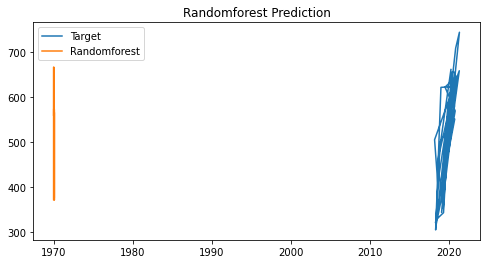

In [119]:
#graphical representation

plt.figure(figsize=(8,4))
plt.plot(y_test, label ='Target')
plt.plot(rf_pred, label='Randomforest')
plt.legend(loc='best')
plt.title('Randomforest Prediction')
plt.show()

### 2. Decision Tree

In [120]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

#Prediction
tree_pred = tree.predict(X_test)

In [121]:
mse = mean_squared_error(y_test, tree_pred )
rmse = np.sqrt(mean_squared_error(y_test, tree_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(y_test, tree_pred)).round(2)
msle = mean_squared_log_error(y_test, tree_pred).round(2)


m_results = pd.DataFrame([['Decision Tree', mse, rmse]], columns = ['Model', 'MSE', 'RMSE',])
results = results.append(m_results, ignore_index = True)
results

,Model,MSE,RMSE
0,Randomforest,4110.989905,64.12
1,Decision Tree,3123.938581,55.89


<BarContainer object of 41 artists>

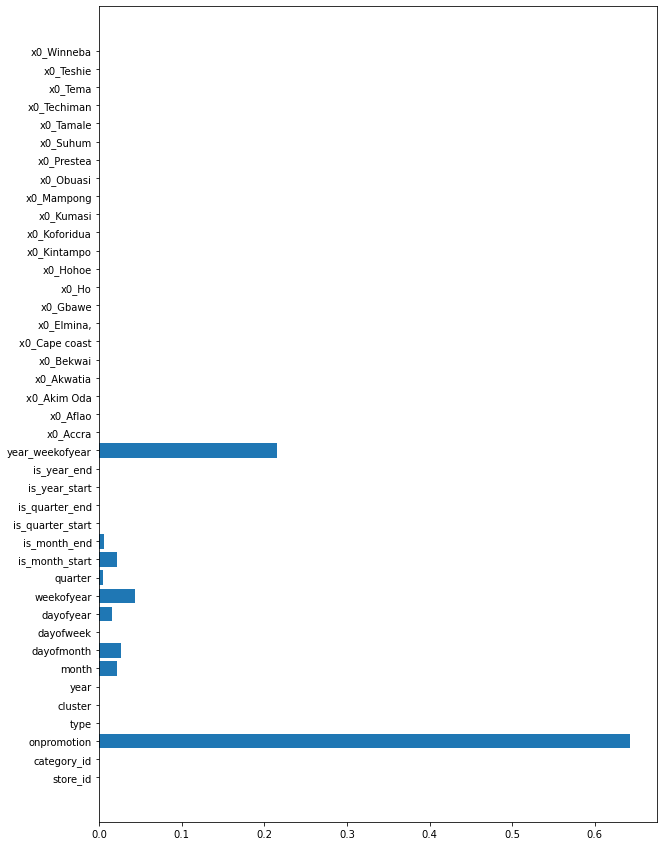

In [122]:
# feature importance for decision tree

plt.figure(figsize=(10,15))
plt.barh(X.columns, tree.feature_importances_)

### 3.XGboost

In [123]:
# fit model no training data
boost = XGBRegressor()
boost.fit(X_train, y_train)

# make predictions for test data
boost_pred = boost.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, boost_pred )
rmse = np.sqrt(mean_squared_error(y_test, boost_pred )).round(2)


m_results = pd.DataFrame([['XGBOOST', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results = results.append(m_results, ignore_index = True)
results

,Model,MSE,RMSE
0,Randomforest,4110.989905,64.12
1,Decision Tree,3123.938581,55.89
2,XGBOOST,1714.572183,41.41


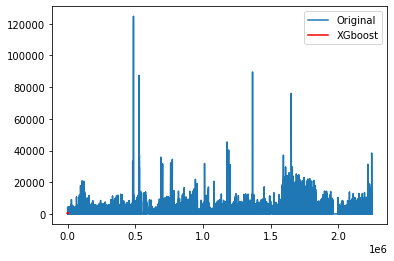

In [125]:
# Graphical Representation

plt.plot(train_data.target.values, label='Original')
plt.plot(boost_pred, color='red', label='XGboost')
plt.legend()

### 4. KNN

In [126]:
neigh = KNeighborsRegressor(n_neighbors=2)
# fit model no training data
neigh.fit(X_train, y_train)

# make predictions for test data
neigh_pred = neigh.predict(X_test)



In [127]:
mse = mean_squared_error(y_test, neigh_pred )
rmse = np.sqrt(mean_squared_error(y_test, neigh_pred )).round(2)


m_results = pd.DataFrame([['KNN', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
results = results.append(m_results, ignore_index = True)
results

,Model,MSE,RMSE
0,Randomforest,4110.989905,64.12
1,Decision Tree,3123.938581,55.89
2,XGBOOST,1714.572183,41.41
3,KNN,2493.398127,49.93


## Back testing testing to see how the model performs

# XGBOOST

In [128]:
backtests = {
    1: ('2018-02-01', '2018-02-16'),
    2: ('2019-09-15', '2019-09-29'),
    3: ('2020-08-01', '2020-08-15'),
}

In [129]:
# Backtests with XGBOOST
scores = {}

for idx, period in enumerate(backtests):
    
    _train = train.reset_index()[train.reset_index()['Date'] < backtests[period][0]]
    _test = train.reset_index()[(train.reset_index()['Date'] >= backtests[period][0]) & (train.reset_index()['Date'] <= backtests[period][1])]
    
    Xtrain, ytrain = _train.set_index(['Date']).drop(columns=['target']).values, _train.target.values
    Xtest, ytest = _test.set_index(['Date']).drop(columns=['target']).values, _test.target.values
    
    boost_model = XGBRegressor().fit(Xtrain, ytrain)
    
    ypred = boost_model.predict(Xtest)
    
    scores[period] = np.sqrt(mean_squared_log_error(ytest, ypred))

print(scores)

{1: 0.338145584222495, 2: 0.04024527847530683, 3: 0.010147302959795605}


# Validation on XGBOOST

In [130]:
# Split the data into parts
x = eval_f.drop(['target'],axis = 1)
y = eval_f['target']

In [131]:
# predictions on x
boost_p = boost.predict(x)

In [132]:
# Scores output
mse = mean_squared_error(y, boost_p )
rmse = np.sqrt(mean_squared_error(y, boost_p )).round(2)


m_results = pd.DataFrame([['XGBOOST', mse, rmse]], columns = ['Model', 'MSE', 'RMSE'])
m_results

,Model,MSE,RMSE
0,XGBOOST,57018.83645,238.79


### The model underfits the validation set with RMSE

# TIME SERIES MODELS

## 1. Autoregression (AR)

In [133]:
x=train['target']
X_train, X_test = x[:30], x[30:]
print(len(X_train), len(X_test))

30 151


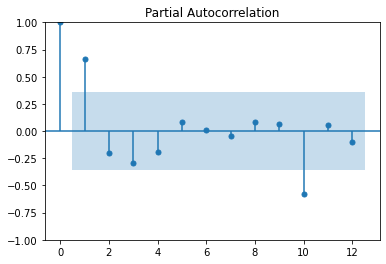

In [134]:
pacf = plot_pacf(X_train,lags = 12)

In [135]:
armodel = AutoReg(X_train, lags = 9).fit()

In [136]:
pred = armodel.predict(
    start=len(X_train),
    end=len(x)-1,
    dynamic=False
)
pred

2018-08-05    388.050269
2018-08-12    372.979414
2018-08-19    337.782704
2018-08-26    333.655932
2018-09-02    319.614807
                 ...    
2021-05-23    379.644926
2021-05-30    379.644918
2021-06-06    379.644894
2021-06-13    379.644864
2021-06-20    379.644837
Freq: W-SUN, Length: 151, dtype: float64

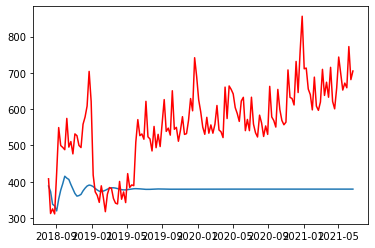

In [137]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(X_test, color='red')

In [138]:
# AR Predictions scores

mse = mean_squared_error(X_test, pred )
msle = mean_squared_log_error(X_test, pred)
rmse = np.sqrt(mean_squared_error(X_test, pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(X_test, pred)).round(5)

results = pd.DataFrame([['AR', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results


,Model,MSE,MSLE,RMSE,RMSLE
0,AR,42437.696253,0.172491,206.0,0.41532


## 2. SARIMA

In [139]:
# Fitting the model
model = SARIMAX(X_train, order=(5, 1, 5), seasonal_order=(0,0,0,0)) 
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                   30
Model:               SARIMAX(5, 1, 5)   Log Likelihood                -157.234
Date:                Sun, 25 Jun 2023   AIC                            336.468
Time:                        19:48:52   BIC                            351.508
Sample:                    01-07-2018   HQIC                           341.178
                         - 07-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6446      1.257     -0.513      0.608      -3.109       1.819
ar.L2          0.1199      1.084      0.111      0.912      -2.004       2.244
ar.L3          0.5419      0.609      0.890      0.373      -0.651       1.735
ar.L4         -0.0400      0.691     -0.058      0.954      -1.394       1.314
ar.L5         -0.5399      0.617     -0.876      0.381      -1.748       0.669
ma.L1          0.5469    116.190      0.005      0.996    -227.182     228.276
ma.L2         -0.4959    172.222     -0.003      0.998    -338.046     337.054
ma.L3         -1.0296    184.232     -0.006      0.996    -362.119     360.059
ma.L4         -0.5009    145.926     -0.003      0.997    -286.510     285.508
ma.L5          0.4815     89.261      0.005      0.996    -174.466     175.429
sigma2      2423.6789   4.48e+05      0.005      0.996   -8.75e+05     8.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.69   Prob(JB):                         0.11
Heteroskedasticity (H):               1.70   Skew:                             0.86
Prob(H) (two-sided):                  0.42   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [140]:
# Make predictions on the test data
SARIMA_pred = model_fit.predict(
    start=len(X_train),
    end=len(x)-1,
    typ="levels")
SARIMA_pred

2018-08-05    373.555700
2018-08-12    371.394514
2018-08-19    367.223591
2018-08-26    349.287449
2018-09-02    371.942855
                 ...    
2021-05-23    390.468846
2021-05-30    393.569756
2021-06-06    389.296770
2021-06-13    390.993764
2021-06-20    393.283583
Freq: W-SUN, Name: predicted_mean, Length: 151, dtype: float64

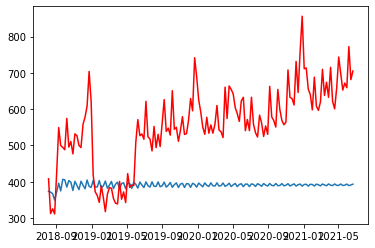

In [141]:
pyplot.plot(SARIMA_pred)
pyplot.plot(X_test, color='red')

In [142]:
# SARIMA Prediction Scores
# Evaluate our models
mse = mean_squared_error(X_test, SARIMA_pred)
msle = mean_squared_log_error(X_test, SARIMA_pred)
rmse = np.sqrt(mean_squared_error(X_test, SARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(X_test, SARIMA_pred)).round(2)

model_results = pd.DataFrame([['SARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,42437.696253,0.172491,206.00,0.41532
1,SARIMA,38607.822437,0.152305,196.49,0.39000


## 3. ARIMA 

In [143]:
stepwise_fit = auto_arima(X_train, trace = True, suppress_warnings = True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=338.012, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=349.730, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=334.335, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=338.738, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=446.999, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=335.533, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=335.865, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=338.115, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.737 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -164.167
Date:                Sun, 25 Jun 2023   AIC                            334.335
Time:                        19:48:57   BIC                            338.538
Sample:                    01-07-2018   HQIC                           335.680
                         - 07-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    133.9488     80.507      1.664      0.096     -23.843     291.740
ar.L1          0.6693      0.201      3.322      0.001       0.274       1.064
sigma2      3251.8909    843.921      3.853      0.000    1597.836    4905.945
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 6.84
Prob(Q):                              0.57   Prob(JB):                         0.03
Heteroskedasticity (H):               1.08   Skew:                             0.96
Prob(H) (two-sided):                  0.90   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [144]:
model = ARIMA(X_train, order=(5,1,4))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                   30
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -157.700
Date:                Sun, 25 Jun 2023   AIC                            335.399
Time:                        19:48:57   BIC                            349.072
Sample:                    01-07-2018   HQIC                           339.682
                         - 07-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0242      0.636     -1.610      0.107      -2.271       0.223
ar.L2         -0.3286      0.606     -0.543      0.587      -1.516       0.858
ar.L3          0.3732      0.420      0.889      0.374      -0.450       1.196
ar.L4          0.2306      0.529      0.436      0.663      -0.806       1.268
ar.L5         -0.2484      0.412     -0.602      0.547      -1.057       0.560
ma.L1          0.9654   1342.450      0.001      0.999   -2630.189    2632.119
ma.L2         -0.0021   1298.726  -1.61e-06      1.000   -2545.459    2545.455
ma.L3         -0.9654   1338.854     -0.001      0.999   -2625.070    2623.139
ma.L4         -0.9979      0.616     -1.619      0.106      -2.206       0.210
sigma2      2509.3751      2.600    965.192      0.000    2504.279    2514.471
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.73   Prob(JB):                         0.29
Heteroskedasticity (H):               1.49   Skew:                             0.68
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.15e+22. Standard errors may be unstable.
"""

In [145]:
# Make predictions on the test data
ARIMA_pred = model_fit.predict(
    start=len(X_train),
    end=len(x)-1,
    typ="levels")
ARIMA_pred

2018-08-05    387.995253
2018-08-12    399.746026
2018-08-19    398.442020
2018-08-26    383.924865
2018-09-02    396.432769
                 ...    
2021-05-23    397.665217
2021-05-30    397.834062
2021-06-06    397.715168
2021-06-13    397.685094
2021-06-20    397.828433
Freq: W-SUN, Name: predicted_mean, Length: 151, dtype: float64

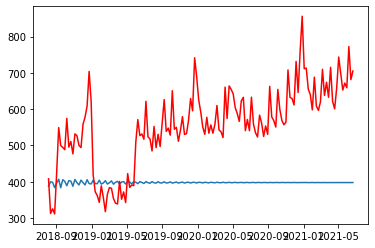

In [146]:
pyplot.plot(ARIMA_pred)
pyplot.plot(X_test, color='red')

In [147]:
# ARIMA Prediction Scores

mse = mean_squared_error(X_test, ARIMA_pred)
msle = mean_squared_log_error(X_test, ARIMA_pred)
rmse = np.sqrt(mean_squared_error(X_test, ARIMA_pred )).round(2)
rmsle = np.sqrt(mean_squared_log_error(X_test, ARIMA_pred)).round(2)

model_results = pd.DataFrame([['ARIMA', mse, msle, rmse, rmsle]], columns = ['Model', 'MSE', 'MSLE', 'RMSE', 'RMSLE'])
results = results.append(model_results, ignore_index = True)
results

,Model,MSE,MSLE,RMSE,RMSLE
0,AR,42437.696253,0.172491,206.00,0.41532
1,SARIMA,38607.822437,0.152305,196.49,0.39000
2,ARIMA,36535.044489,0.141948,191.14,0.38000


## The model with the best RMSE score is the XGBRegressor

## The time series best model was ARIMA model and is selected for our prediction

# Test_Prediction and submission

In [148]:
test = test_data.values

In [149]:
# Predictions on the test_data
prediction = boost.predict(test)

In [150]:
df_test['target'] = prediction

In [152]:
df_test['YW'] = 'year_week'
df_test['ID'] = df_test['YW']+'_'+df_test['year_weekofyear'].astype(str)+'_'+df_test['store_id']+'_'+df_test['category_id']


submission = df_test[['ID', 'target']]

In [153]:
# overview of submission Test 
submission.head()

,ID,target
0,year_week_425_store_1_category_24,472.197327
1,year_week_425_store_1_category_21,472.197327
2,year_week_425_store_1_category_32,472.197327
3,year_week_425_store_1_category_18,548.178589
4,year_week_425_store_1_category_26,472.197327


In [154]:
# prediction over all ID by their total.

t = submission.groupby('ID')['target'].sum().reset_index()
prediction_sub = submission.merge(t, on='ID').rename(columns={'target_y':'target'}).drop('target_x', axis=1)

# Log transformation on prediction

In [155]:
prediction_sub['target'] = np.log1p(abs(prediction_sub['target']))

In [156]:
# Save sample submission
prediction_sub.to_csv('Sample Submission.csv', index=False)

### Creating a dictionary of objects to export

In [157]:
exports = {"OneHotEncoder": encoder,
           "model": boost}

# Exporting the dictionary with Pickle
with open("toolkit_folder", "wb") as file:
    pickle.dump(exports, file)

In [158]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [159]:
import session_info
session_info.show()